<a href="https://colab.research.google.com/github/uday-routhu/week3/blob/master/Copy_of_Data_Visualization_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization Core

- Student Name: udaykumar routhu

## Import Packages and Load Data

In [ ]:
# import the required packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
## Save the filepath to the data as a variable "fpath"
fpath="/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/insurance_mod.csv"
df = pd.read_csv(fpath)

In [ ]:
# Read in the file and disply the info and head
df.info

<bound method DataFrame.info of       age     sex     bmi  children  smoker     region  charges
0      19  female  27.900         0       1  southwest  16885.0
1      18    male  33.770         1       0  southeast   1726.0
2      28    male  33.000         3       0  southeast   4449.0
3      33    male  22.705         0       0  northwest  21984.0
4      32    male  28.880         0       0  northwest   3867.0
...   ...     ...     ...       ...     ...        ...      ...
1333   50    male  30.970         3       0  northwest  10601.0
1334   18  female  31.920         0       0  northeast   2206.0
1335   18  female  36.850         0       0  southeast   1630.0
1336   21  female  25.800         0       0  southwest   2008.0
1337   61  female  29.070         0       1  northwest  29141.0

[1338 rows x 7 columns]>

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16885.0
1,18,male,33.770,1,0,southeast,1726.0
2,28,male,33.000,3,0,southeast,4449.0
3,33,male,22.705,0,0,northwest,21984.0
4,32,male,28.880,0,0,northwest,3867.0


## Explore Correlation

### 1\) Correlation Heatmap

1a) Define a variable containing the correlations between variables in the insurance dataset.

In [ ]:
# Find correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,age,bmi,children,smoker,charges
age,1.00,0.11,0.04,-0.03,0.30
bmi,0.11,1.00,0.01,0.00,0.20
children,0.04,0.01,1.00,0.01,0.07
smoker,-0.03,0.00,0.01,1.00,0.79
charges,0.30,0.20,0.07,0.79,1.00


1b) Make a heatmap of the correlations and annote with the values.

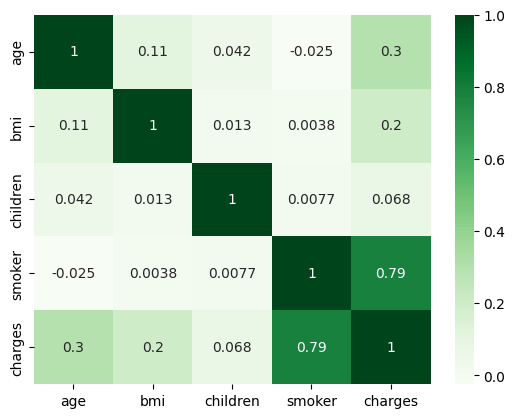

In [ ]:
# Make a heatmap using the correlations from above
sns.heatmap(corr, cmap = 'Greens', annot = True);

1c) **Are there arny strong correlations?
Is it a positive or negative correlation?**

- Your Answer:
  - `yes, more than 0.7 is considered as STRONG corelation , here I see charges has 1 so it considered to be positive co-relation`


## Explore Charges vs. Smokers

### 2\) Barplot - Charges for Smokers vs. Non-Smokers

2a) Make a barplot to visualize the mean of charges for smokers and nonsmokers.

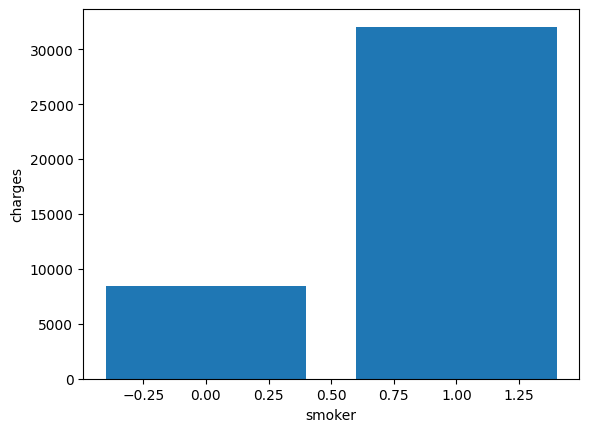

In [ ]:
# Make a barplot of smoker vs charges
smoke_charges = df.groupby('smoker')['charges'].mean()
fig, ax = plt.subplots()
ax.bar(smoke_charges.index, smoke_charges.values);
ax.set_ylabel('charges')
ax.set_xlabel("smoker");

In [ ]:
#Using seaborn but you didn't specify that USE seaborn group means so commenting out
#ax = sns.barplot(data=df, x='smoker', y="charges")

2b) Is the mean of charges higher for smokers or nonsmokers? ((In a future course, you will explore how to calculate the statistical significance of this difference)

- Your Answer:
  -  `smokers`

### 3\) Boxplot - Charges for Smokers vs. Non-Smokers


3a) Create a boxplot with x as smokers and y as charges.


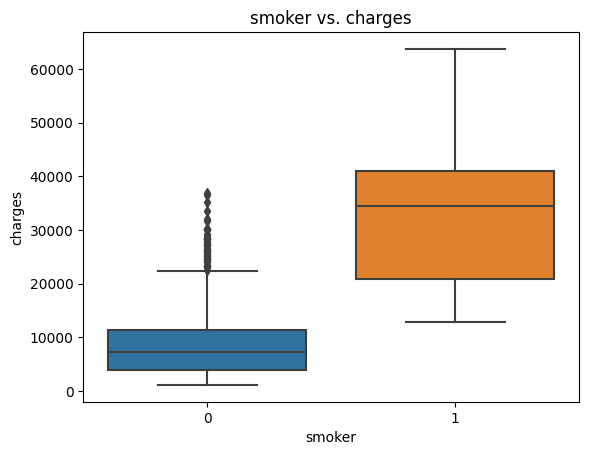

In [ ]:
# Create a boxplot of smoker vs. charges
ax = sns.boxplot(x = 'smoker', y = 'charges', data = df)
ax.set_title('smoker vs. charges');


3b) What information does this include that you could not see in your bar chart?
- Answer(s):
  - `smoker has less/lower median value and less and much less variant in the measurement`

## Explore Charges for Males vs. Females

### 4\) Barplot - Charges for Males vs. Females

4a) Make a searborn barplot to visualize the difference in charges between males and females.

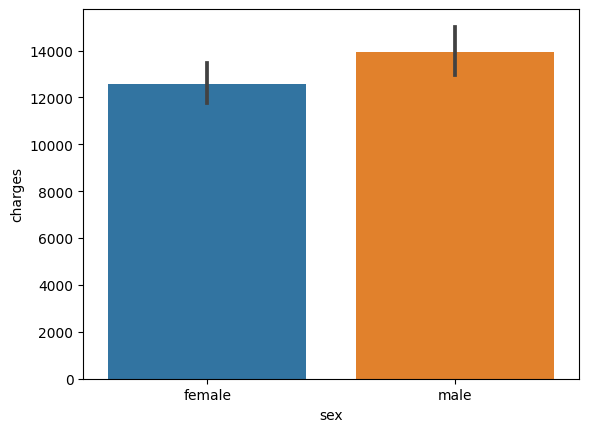

In [ ]:
# Make a barplot of sex vs. charges
ax = sns.barplot(data=df, x='sex', y="charges")

4b)  Is the mean of charges higher for males or females?

- Your Answer:
  - `male`

### 5\) Grouped Barplot - Charges by Sex and Smoker

5a\) Create a seaborn barplot to visualize the diference between insurance charges grouped by Smoker (on the x-axis), and Sex (the hue).

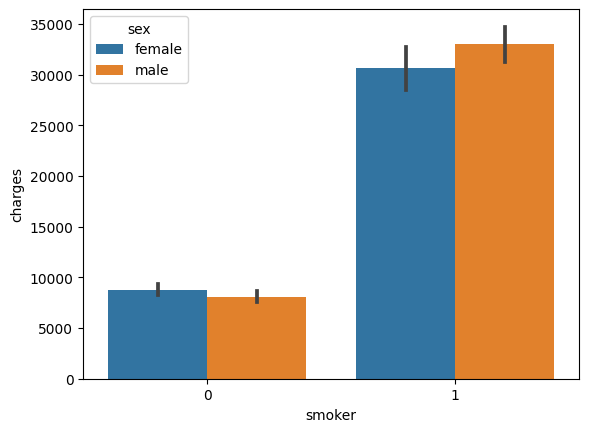

In [ ]:
# Create a barplot of smoker vs charges, colored by sex
x = sns.barplot(data=df, x="smoker", y="charges", hue='sex')

5b\) What do you observe? Which of the 4 groups has the highest average charges?
- Your Answer:
  - `males are highest smokers when it compared to genders and Females are lowest in non-smokers`

## Explore Age vs. Charges

### 6\) Scatter Plot - Age vs. Charges

6a) Make a scatterplot to visualize the relationship between charges and age for the entire dataset

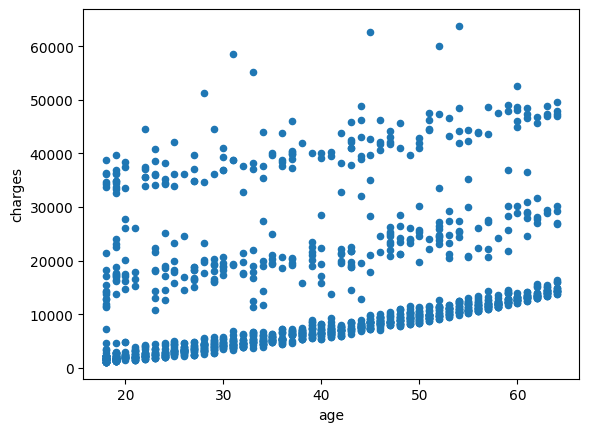

In [ ]:
# Create a scatter plot of age vs charges
ax = df.plot(kind='scatter', x='age', y='charges');

6b) Desribe what you notice from the visualization.
- Your Answer:
  - `unusual values have higher values `

### 7\)  Grouped Scatter Plot - Age vs. Charges, colored by Smoker

7a) Make a scatterplot to visualize the relationship between charges and age, but colored by smoker or not.

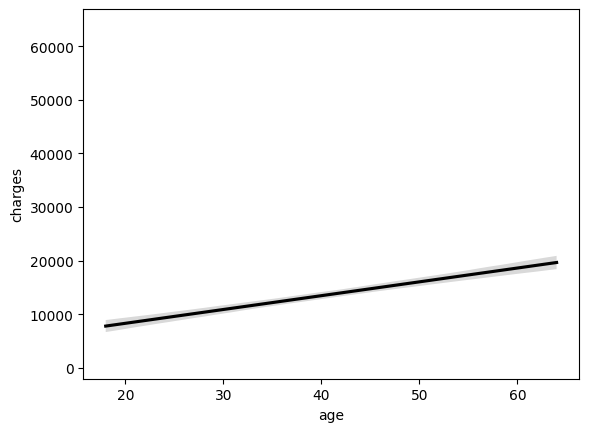

In [ ]:
# make another scatterplot of age vs charges, but colored by smoker
# (using seaborn will make this easy)
line_kws = dict(color='black')
scatter_kws  = dict(color='white')
ax = sns.regplot(data=df, x="age", y="charges",line_kws=line_kws,
                 scatter_kws =scatter_kws )

7b) Desribe what you notice from the visualization.

            Ans: There is co-relation between age and charges , when age getting increased , charges getting increased.

### 8\) Grouped Scatter Plot - Age vs. Charges, colored by Sex

8a) Make a scatterplot to visualize the relationship between charges and age, but colored by sex.

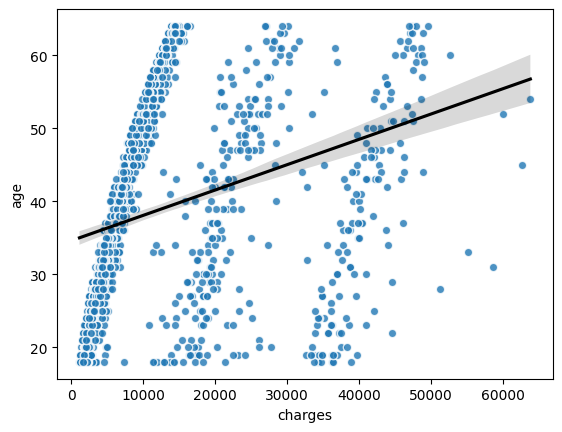

In [ ]:
# make another scatterplot of charges vs age, but this time color the dots by sex
line_kws = dict(color='black')
scatter_kws = dict(edgecolor='white')
ax = sns.regplot(data=df, x="charges", y="age",
                 line_kws=line_kws, scatter_kws=scatter_kws);

8b) Describe what you notice from the visualization

- Your Answer:
  - `When charges are higher, age in getting decreased. There is corelation between age and charges`

## Explore BMI

### 9\) Regplot - Charges vs. BMI

9a) Make a seaborn regplot to visualize the relationship between charges and bmi for the entire dataset

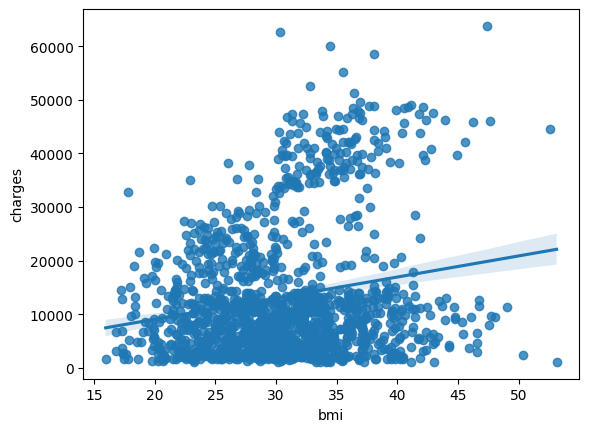

In [ ]:
# Make a seaborn regplot for bmi vs. charges.
ax = sns.regplot(data=df, x="bmi", y="charges")

9b\) What do you notice from the visualization? *(There are many correct answers.)*

- Your Answer:
  - `Higher bmi value, has lower charges`

### 10\) Scatterplot - Charges vs. BMI - Colored by Smoker

10a) Make a scatterplot to visualize the relationship between charges and bmi colored by smoker or not

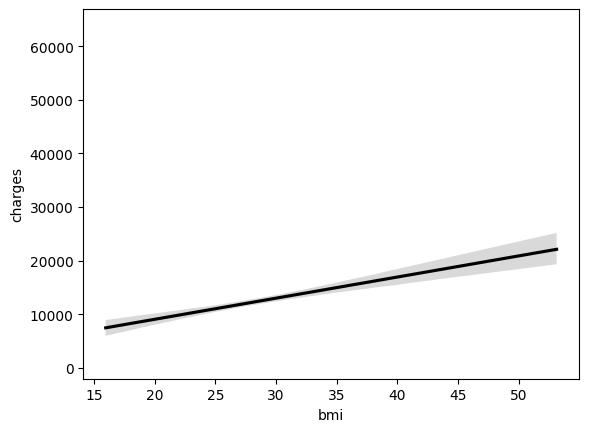

In [ ]:
# Make a scatterplot of bmi vs charges, colored by smoker
line_kws = dict(color='black')
scatter_kws  = dict(color='white')
ax = sns.regplot(data=df, x="bmi", y="charges",line_kws=line_kws,
                 scatter_kws =scatter_kws )

10b) What do you notice from the visualization? (There are many correct answers.)

- Your Answer:
  - `Chrages are increasing when bmi value getting higher`

### 11\)  Linear Model Plot - Charges vs. BMI - Colored by Smoker



11a) Compare the relationship of bmi and charges for smokers and nonsmokers using seaborn's `lmplot` to calculate a separate trendline for Smokers vs. Non-Smokers.


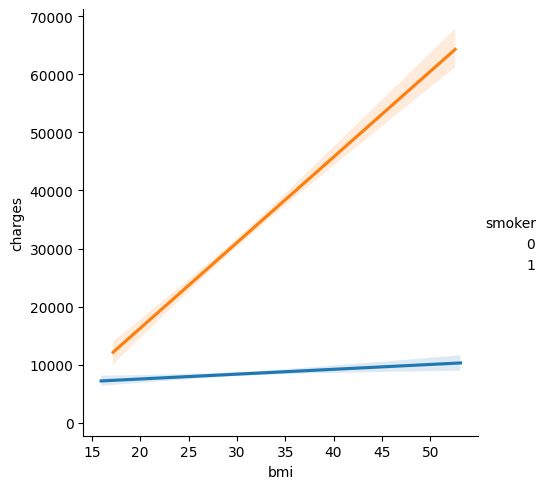

In [ ]:
# Create an lmplot of bmi vs. charges, colored by smoker.
g= sns.lmplot(data=df, x="bmi", y="charges",
               scatter_kws=scatter_kws,
                hue="smoker");

11b) What do you notice from the visualization? (Compare the trendlines.)

- Your Answer:
  - `high bmi value for male smokers`

## Explore Regions

### 12\) Countplot for Regions

12a) Make a countplot to show how many customers per region.

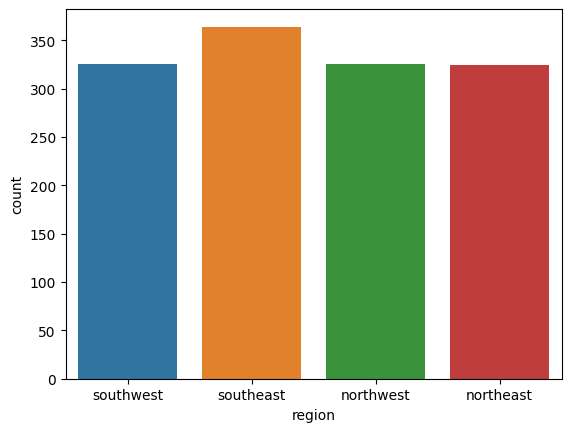

In [ ]:
# Make a countplot for region
ax = sns.countplot(data=df, x='region')

12b) Which region appears the most in this data set?

- Your Answer:
  - `southeast`

### 13\) Barplot of Charges by Region

13a) Make a barplot to show average charges by region.

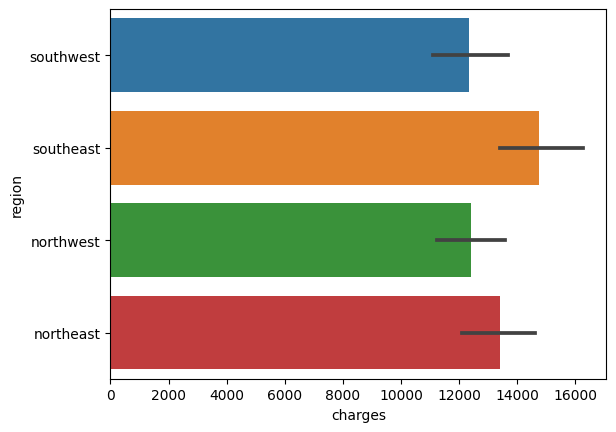

In [ ]:
# make a barplot of charges by region
ax = sns.barplot(data=df, x='charges', y='region')

13b) Which region has the highest average charges?

- Your Answer:
  - `southheast`

### 14\) Bar Chart of Ratios (%) of Smokers in Each Region

14a) Calculate the ratio of smokers in each region and save it as a variable called "percent_smoker_by_region". (Hint: use .groupby with "region" combined with slicing the "smoker" column and end with .mean() )

In [ ]:
# use groupby to get the mean of smoker grouped by region
percent_smoker_by_region = df.groupby('region')['smoker'].mean()


14b) Plot the ratios of smokers by region as a bar plot.



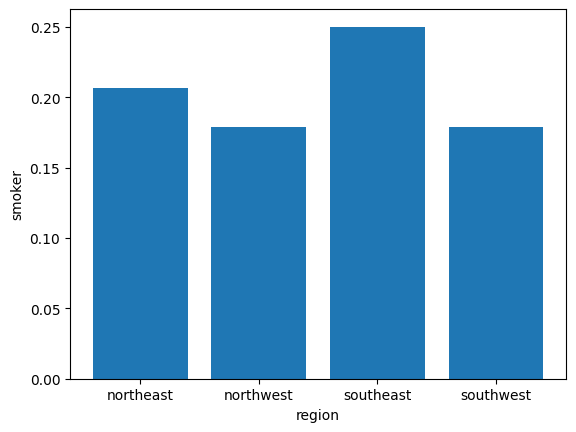

In [ ]:
# Plot the ratios (the results of then groupby above)
fig, ax = plt.subplots()
ax.bar(percent_smoker_by_region.index, percent_smoker_by_region.values);
ax.set_ylabel('smoker')
ax.set_xlabel("region");

14c) Which region has the highest ratio of smokers?

- Your Answer:
  - `southeast has higest smokers and nothwest & southwest has same ratio`

> You've completed the assignment! Download your notebook and upload it as your submission.